# Dylan Saunders

## Research question/interests

- #### What affect does the goverments economic system and practices have on the nations economic stability and consistancy?
- Comparing the countries India, New Zealand, and China which have very different economic systems
- #### How much inflation changes over time and if countries show similar trends or if every country tends to run on their own cycle?
- Using violinplot and can show how much variation the data is between countries and between years of the same country
- #### What is the difference in CPI changes between energy, food, and the total cpi?
- Comparing both Location and Subject of different countries can show the variations between all three subjects we can easily visualize how much of a difference there is between the subjects
- #### By adapting this data can I describe and display CPI in a way that someone learning it for the first time can understand what it is and what it describes? 
- By graphing and displaying the values in a complex but clear manner it is easier to observe and understand what CPI is and it desribes about the econmy. 
- Inflation and CPI is said to change the world economy and potentially all of society, if that is the case I hope to learn as much as possible about it. 
- Learning to use dataset with finances will assist my future career developement of potentially working in the data analytics field for a finacial firm. 


## Analysis pipeline
1. Load data
    - load data using a relative path  
2. Clean data 
    - change data type of time column to integer
    - drop columns Frequency and Flag Codes since their values are not necessary with our calculations
    - drop rows that have Q1, Q2, Q3, and Q4 to make data more simple and easier to work with
    - no columns remaining have NaN values
3. Process data 
    - seperate the data set into the three subjects of the remaining rows ENRG, TOT, and FOOD
    - create max, min, and mean columns for each country and split into each subject
    - split data into different countries or subject and countries based on what counries we want to compare
4. Wrangle data 
    - The data set is already assembled in and organized and clear way and the only restructuring required was changing time data type to int 
    - This data set is highly compreshensive no other data sets have been required to merge together


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax
import code


In [ ]:
from code10 import project_functions1 as pf
dfclean = pf.load_and_process('./../data/raw/Inflationdataset.csv')
dfclean

,LOCATION,SUBJECT,TIME,Value
0,AUS,ENRG,1972,4.910070
1,AUS,ENRG,1973,3.762801
2,AUS,ENRG,1974,13.173540
3,AUS,ENRG,1975,19.422470
4,AUS,ENRG,1976,8.833195
...,...,...,...,...
6070,OECD,TOT,2017,2.281483
6071,OECD,TOT,2018,2.607160
6072,OECD,TOT,2019,2.068702
6073,OECD,TOT,2020,1.370630


- There are 293 430 rows and 8 columns 
- Dropped columns Flag codes, frequency, indicator, and measure due to them not being needed for our purposes. 
- Drop rows after the specific collector and setup of yearly data and without repeats of years
- The column location lists 47 countries and 6 orginization of multiple countreis by its 3 or 4 letter indentifier. 
- The Subject column has 3 categories Energy, Food, and Total. These are the 3 Consumer price index(CPI) categories measured. CPI is the measure of price change in a year or quarter for a basket of goods of either a specific category or in total. 
- Time is measured in years from 1921 to 2022 however different countries have more or less years due to the availability of past data. 
- The value column is the percentage change in the price of goods of the subject and year in question
- To analyze this data I will split it up by subjects both into new data sets and on graphs. I will also use only specific locations due to the amount of countries most graphs can't easily represent the large amount of data included in all countries.

In [ ]:
def load_ENRG(dfclean):
    dfenergy=dfclean.loc[dfclean['SUBJECT'] == "ENRG"].reset_index(drop=True)
    df_time_int=pd.to_numeric(dfenergy["TIME"])
    dfenergy["TIME"]=df_time_int
    return dfenergy
dfenergy=load_ENRG(dfclean)
dfenergy

,LOCATION,SUBJECT,TIME,Value
0,AUS,ENRG,1972,4.910070
1,AUS,ENRG,1973,3.762801
2,AUS,ENRG,1974,13.173540
3,AUS,ENRG,1975,19.422470
4,AUS,ENRG,1976,8.833195
...,...,...,...,...
1692,OECD,ENRG,2017,6.779777
1693,OECD,ENRG,2018,7.590147
1694,OECD,ENRG,2019,0.451155
1695,OECD,ENRG,2020,-6.341600


- ENRG means Energy so it contains the CPI values for only the energy subject. This makes it easier to focus on one subject and get a better idea of what is happening in this category.

In [ ]:
def load_FOOD(dfclean):
    dffood=dfclean.loc[dfclean['SUBJECT'] == "FOOD"].reset_index(drop=True)
    df_time_int=pd.to_numeric(dffood["TIME"])
    dffood["TIME"]=df_time_int
    return dffood
dffood=load_FOOD(dfclean)
dffood

,LOCATION,SUBJECT,TIME,Value
0,AUS,FOOD,1956,7.315458
1,AUS,FOOD,1957,-1.449722
2,AUS,FOOD,1958,0.876369
3,AUS,FOOD,1959,2.978591
4,AUS,FOOD,1960,5.483579
...,...,...,...,...
1960,OECD,FOOD,2017,1.472671
1961,OECD,FOOD,2018,1.878794
1962,OECD,FOOD,2019,2.077501
1963,OECD,FOOD,2020,3.424471


- FOOD means Food so it contains the CPI values for only the food subject. This makes it easier to focus on one subject and get a better idea of what is happening in this category.

In [ ]:
def load_TOT(dfclean):
    dftot=dfclean.loc[dfclean['SUBJECT'] == "TOT"].reset_index(drop=True)
    df_time_int=pd.to_numeric(dftot["TIME"])
    dftot["TIME"]=df_time_int
    return dftot
dftot=load_TOT(dfclean)
dftot

,LOCATION,SUBJECT,TIME,Value
0,AUS,TOT,1950,8.695652
1,AUS,TOT,1951,19.428570
2,AUS,TOT,1952,17.224880
3,AUS,TOT,1953,4.489796
4,AUS,TOT,1954,1.562500
...,...,...,...,...
2408,OECD,TOT,2017,2.281483
2409,OECD,TOT,2018,2.607160
2410,OECD,TOT,2019,2.068702
2411,OECD,TOT,2020,1.370630


- TOT means total so it contains the CPI values for only the total basket of goods involved in measuring CPI for both energy and food combined. This makes it easier to focus on one subject and get a better idea of what is happening in this category.

[Text(0.5, 1.0, 'Canada Energy CPI from 1961-2022'),
 Text(0.5, 0, 'Years 1961 - 2022'),
 Text(0, 0.5, 'Energy CPI')]

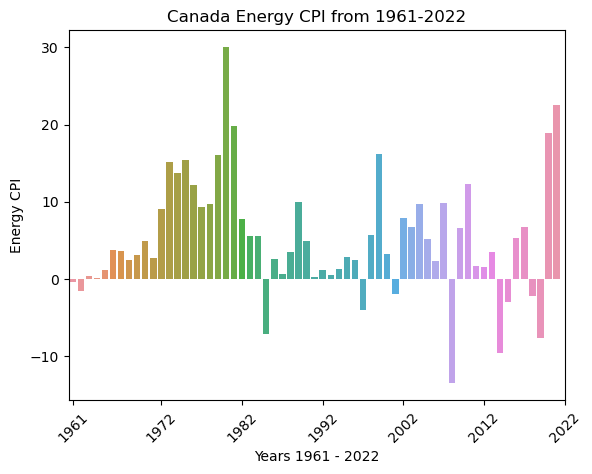

In [ ]:
df_enrg_CAN= dfenergy.loc[dfenergy['LOCATION']=="CAN"]
df_enrg_CAN.reset_index()

CAN_sub_plot=sns.barplot(data=df_enrg_CAN, x=df_enrg_CAN['TIME'], y=df_enrg_CAN['Value'])
CAN_sub_plot.set_xticklabels(CAN_sub_plot.get_xticklabels(range(20)), rotation=45)
plt.xticks([0, 11, 21,31,41,51,61], ['1961','1972', '1982','1992','2002', '2012', '2022'])
CAN_sub_plot.set(title='Canada Energy CPI from 1961-2022', xlabel='Years 1961 - 2022', ylabel='Energy CPI')
#Canadas CPI of energy from 1961-2022 and shows how much inflation changes throughout the years for a specific country


In [ ]:
df_max=dfclean.groupby(by=["LOCATION","SUBJECT"]).agg({"Value":["max", "min", "mean"]})
df_max.columns = [ 'max','min', 'mean']
df_max
#Displays the different subjects vary in values for the same country

max        min       mean
LOCATION SUBJECT                                
AUS      ENRG     27.23942  -7.186137   6.580013
         FOOD     15.35854  -3.697105   4.654477
         TOT      19.42857  -0.319489   4.903905
AUT      ENRG     39.24276 -11.665090   4.183044
         FOOD     10.74824  -1.722898   2.888177
...                    ...        ...        ...
USA      FOOD     16.29268  -2.397707   3.520026
         TOT      13.54920  -0.355546   3.668527
ZAF      ENRG     26.78758  -2.461501   9.582968
         FOOD     25.25466   1.201602  10.373790
         TOT      18.65492  -0.692031   7.596606

[116 rows x 3 columns]

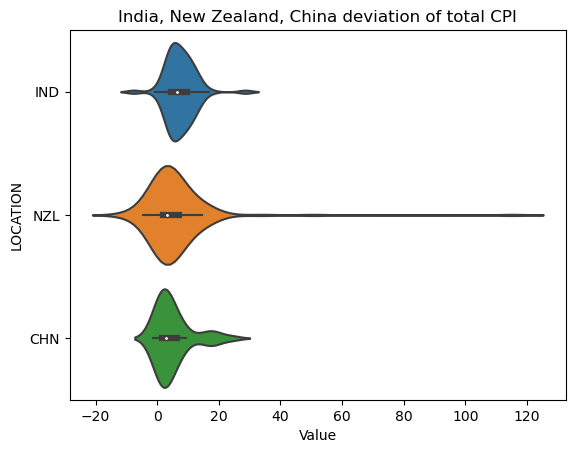

In [ ]:
df_tot_IND= dftot.loc[dftot['LOCATION']=="IND"].reset_index(drop=True)
df_tot_NZL= dftot.loc[dftot['LOCATION']=="NZL"].reset_index(drop=True)
df_tot_CHN= dftot.loc[dftot['LOCATION']=="CHN"].reset_index(drop=True)
df_tot_comp= pd.concat([df_tot_IND, df_tot_NZL,df_tot_CHN], ignore_index=True).reset_index(drop=True)
tot_comp_plot=sns.violinplot(data=df_tot_comp, x="Value", y="LOCATION", scale ="width").set_title('India, New Zealand, China deviation of total CPI')
#this displays that in 3 countries India, New Zealand, and China with very different economic 
#systems their CPI generally stays in the same range. India is more socialist, 
#New Zealand is more capitilist, China is more communist. 

Text(0.5, 0.98, 'Australian Compared to USA for each Subject')

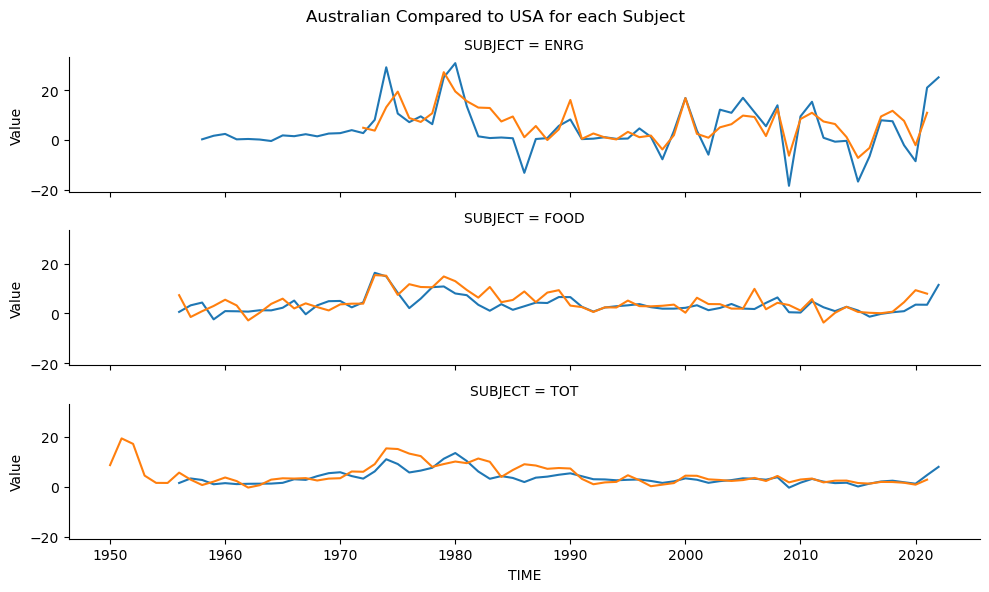

In [ ]:
df_USA= dfclean.loc[dfclean['LOCATION']=="USA"]
df_USA.reset_index()
df_AUS= dfclean.loc[dfclean['LOCATION']=="AUS"]
df_AUS.reset_index()
df_USA_AUS= pd.concat([df_USA, df_AUS], ignore_index=True)
rp = sns.FacetGrid(df_USA_AUS, row="SUBJECT", aspect=5, height=2)
rp.map_dataframe(sns.lineplot, x= "TIME", y="Value", hue ='LOCATION')
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle("Australian Compared to USA for each Subject")
#Compares two countries Australia and United States of America CPI for all subjects and displays 
#how they vary in values for subjects as well and by comparing multiple countries it is easier 
#to see what the trends are. 


